[View in Colaboratory](https://colab.research.google.com/github/willyptrain/Node/blob/master/running_data_projection.ipynb)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import numpy as np

files.upload()

run_data = pd.read_csv('running_data.csv')



Saving running_data.csv to running_data (3).csv


In [0]:
import matplotlib

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1320: UserWarning:

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans



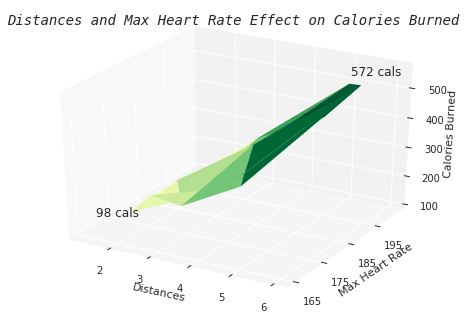

In [180]:
x_distances = run_data["Distance"]
y_max_hr = run_data["Max HR"]
z_calories = run_data['Calories']

def new_surface():
  ax = plt.axes(projection='3d')
  ax.plot_trisurf(x_distances, y_max_hr, z_calories, 
                  cmap='YlGn', edgecolor='none')
  ax.set_xlabel("Distances")
  ax.set_ylabel("Max Heart Rate")
  ax.set_zlabel("Calories Burned")
  title_dict = {
      'family': 'monospace',
      'size': 14,
      'style': 'oblique'
  }
  
  ax.set_title("Distances and Max Heart Rate Effect on Calories Burned", 
              fontdict=title_dict)
  max_vals = get_max_values()
  min_vals = get_min_values()
  ax.text(max_vals['max_x']-0.5, max_vals['max_y']+4, max_vals['max_z'],
         str(max_vals['max_z'])+" cals")
  ax.text(min_vals['min_x']-0.5, min_vals['min_y']-5, min_vals['min_z'],
         str(min_vals['min_z'])+" cals")
  #matplotlib.rcParams['font.size'] = 12
  plt.yticks(np.arange(165, 200, 10.0))
  plt.show()
  
def get_max_values():
  max_index = z_calories.idxmax()
  max_x = x_distances[max_index]
  max_y = y_max_hr[max_index]
  max_z = z_calories[max_index]
  val_dict = {
      'max_x': max_x,
      'max_y': max_y,
      'max_z': max_z
  }
  return val_dict
  
def get_min_values():
  min_index = z_calories.idxmin()
  min_x = x_distances[min_index]
  min_y = y_max_hr[min_index]
  min_z = z_calories[min_index]
  val_dict = {
      'min_x': min_x,
      'min_y': min_y,
      'min_z': min_z
  }
  return val_dict
  
new_surface()